In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Elastic Net

In [2]:
data_raw = pd.read_csv('data_olahan_3.csv')
data_raw

,Company,Tahun_Buku,Tanggal Rilis,kas,jumlah_aset_lancar,piutang,jumlah_aset_tidak_lancar,jumlah_aset,jumlah_liabilitas_jangka_pendek,jumlah_liabilitas_jangka_panjang,...,AR_Turnover_in_Days,Aset_Turnover,debt_to_equity,equity_ratio,debt_ratio,gpm,net_profit_margin,roa,roce,share_amount
0,NICK,2021,2022-03-14 10:08:00,1.151513e+10,3.043375e+11,1.000000e-06,1.096604e+10,3.153035e+11,8.257848e+08,1.980080e+08,...,1.671185e-15,0.692691,0.003258,0.996753,0.003247,0.990364,0.990644,0.686210,0.687818,6.511500e+08
1,AALI,2020,2021-02-24 14:27:00,9.788920e+05,5.937890e+06,1.513218e+06,2.184334e+07,2.778123e+07,1.792506e+06,6.740931e+06,...,2.936796e+01,0.676969,0.443346,0.692834,0.307166,0.077771,0.024845,0.016819,0.056280,1.924688e+09
2,ACST,2020,2021-02-24 14:37:00,7.340000e+04,8.791300e+04,8.511470e+05,2.967193e+06,3.055106e+06,3.460400e+04,2.696470e+06,...,2.579385e+02,0.394235,8.428408,0.106062,0.893938,-1.114453,-1.110075,-0.437630,-0.444389,1.267516e+10
3,ADMF,2020,2021-02-18 12:43:00,7.617200e+04,5.002878e+06,2.274517e+07,2.422764e+07,2.923051e+07,1.628666e+07,5.018575e+06,...,9.386586e+02,0.302578,2.688265,0.271130,0.728870,0.166932,0.114773,0.034728,0.114065,1.000000e+08
4,AMFG,2020,2021-04-16 16:16:00,2.989810e+05,1.932986e+06,4.500070e+05,6.028671e+06,7.961657e+06,2.404568e+06,2.627252e+06,...,4.359388e+01,0.473242,1.717440,0.367993,0.632007,-0.123613,-0.127421,-0.060301,-0.083812,4.340000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,ZINC,2022,2023-06-26 21:49:00,5.346490e+10,6.777764e+11,4.375605e+11,1.798178e+12,2.475954e+12,7.080128e+11,9.948196e+11,...,2.226409e+02,0.289723,2.202541,0.312252,0.687748,-0.179672,-0.159128,-0.046103,-0.072902,2.525000e+10
2369,ZONE,2022,2023-04-03 15:09:00,4.910326e+09,3.747793e+11,4.837608e+10,2.770019e+11,6.517812e+11,1.991748e+11,1.057582e+11,...,2.624128e+01,1.032373,0.879154,0.532154,0.467846,0.144271,0.107514,0.110994,0.214485,8.701715e+08
2370,ZYRX,2022,2023-05-02 13:37:00,2.063763e+11,6.232536e+11,1.323574e+11,8.397621e+10,7.072298e+11,4.322842e+11,6.656257e+09,...,6.271068e+01,1.089278,1.636071,0.379352,0.620648,0.131564,0.102199,0.111323,0.368629,1.333335e+09
2371,JKSW,2020,2021-06-04 08:54:00,8.820607e+09,5.947902e+10,4.100464e+10,1.098151e+11,1.692941e+11,2.023736e+10,6.459183e+11,...,2.953282e+04,0.002993,-1.340727,-2.934902,3.934902,-17.044078,-2.234855,-0.006690,-0.057949,1.500000e+08


In [3]:
data_raw = data_raw[["per","current_ratio","cash_ratio","AR_Turnover","AR_Turnover_in_Days","Aset_Turnover","debt_to_equity","equity_ratio","debt_ratio","gpm","net_profit_margin","roa","roce"]]
data_raw.replace({np.inf: 0.0000000001, -np.inf: -0.0000000001}, inplace=True)
data_raw.to_csv('data_olahan_4.csv', index=False)

C:\Users\arsen\AppData\Local\Temp\ipykernel_13044\3343625966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw.replace({np.inf: 0.0000000001, -np.inf: -0.0000000001}, inplace=True)


In [4]:
header  = data_raw.columns.values.tolist()
scaler = StandardScaler()
# data_raw = pd.DataFrame(scaler.fit_transform(data_raw), columns=header)
# data_raw


In [5]:
y = scaler.fit_transform(data_raw[['per']])
X = data_raw.drop(['per'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = ElasticNet(alpha=0.2, l1_ratio=0.5, random_state=42)

In [8]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.2, random_state=42)

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.004659021958360307


# Neural Network

In [10]:
regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=5000, activation='relu', solver='adam', random_state=42)

# 3. Training
# Train the neural network
regressor.fit(X_train, y_train)

# 4. Evaluation
# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")




c:\Users\arsen\anaconda3\envs\skripsi\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 3.36


In [11]:
print(len(y_pred))
print(len(y_test))
print(len(X_test))
print(len(X_train))
X_test


475
475
475
1898


,current_ratio,cash_ratio,AR_Turnover,AR_Turnover_in_Days,Aset_Turnover,debt_to_equity,equity_ratio,debt_ratio,gpm,net_profit_margin,roa,roce
834,1.259204,0.062895,1.915871,190.513837,0.196860,0.569023,0.637339,0.362661,-0.341200,-0.328421,-0.064653,-0.080135
1509,2.327778,0.246840,8.529349,42.793419,3.503609,0.933420,0.517218,0.482782,0.050995,0.041302,0.144707,0.291786
100,0.942976,0.019921,0.110198,3312.227217,0.067659,6.121405,0.126595,0.774937,0.418189,0.336364,0.022758,0.131010
1844,0.881145,0.247353,18.076031,20.192486,0.559906,1.211845,0.452111,0.547889,0.205793,0.155879,0.087278,0.151220
56,2.937345,0.478664,8.054208,45.317924,2.638640,0.421065,0.703698,0.296302,0.042220,0.033176,0.087540,0.155682
...,...,...,...,...,...,...,...,...,...,...,...,...
457,6.166799,1.941560,4.946046,73.796328,0.575386,0.102397,0.907114,0.092886,0.046315,0.035099,0.020196,0.028274
2204,2.099339,1.024547,7.692047,47.451608,0.952754,0.540499,0.649140,0.350860,0.145554,0.109346,0.104180,0.162819
2010,3.498807,0.349655,2.819217,129.468587,0.597243,0.441610,0.693669,0.306331,0.018331,0.021995,0.013137,0.013645
1404,1.296193,0.189539,4.928826,74.054150,0.782081,3.824769,0.207264,0.792736,0.013974,0.015016,0.011744,0.015894


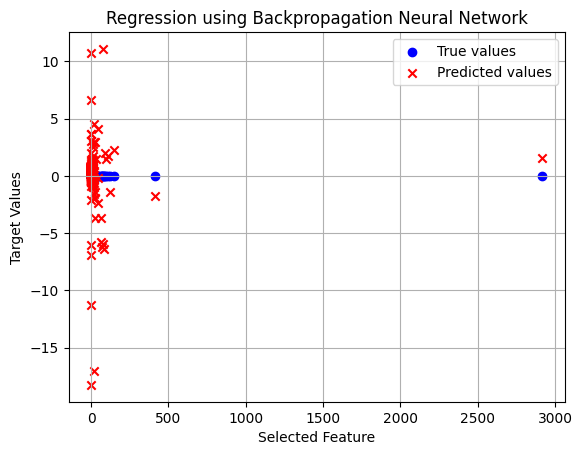

In [12]:
# If X_test is a DataFrame, select the first column for visualization
feature_to_plot = X_test.iloc[:, 0].values

plt.scatter(feature_to_plot, y_test, color='blue', label='True values')
plt.scatter(feature_to_plot, y_pred, color='red', marker='x', label='Predicted values')
plt.legend()
plt.title('Regression using Backpropagation Neural Network')
plt.xlabel('Selected Feature')
plt.ylabel('Target Values')
plt.grid(True)
plt.show()


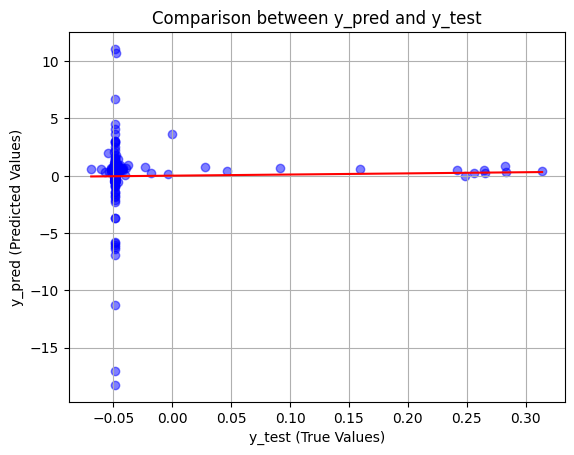

In [13]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line of identity

plt.title('Comparison between y_pred and y_test')
plt.xlabel('y_test (True Values)')
plt.ylabel('y_pred (Predicted Values)')
plt.grid(True)
plt.show()